In [1]:
# notebooks/04_inspect_predictions.ipynb

import pandas as pd

# Load predictions
df = pd.read_csv("../data/interim/predictions.csv")

# Show basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (8850, 12)
Columns: ['filename', 'json_file', 'status', 'age', 'gender', 'cough_detected', 'respiratory_condition', 'fever_muscle_pain', 'difficulty_in_breathing', 'label', 'predicted_prob', 'predicted_label']


,filename,json_file,status,age,gender,cough_detected,respiratory_condition,fever_muscle_pain,difficulty_in_breathing,label,predicted_prob,predicted_label
0,00039425-7f3a-42aa-ac13-834aaa2b6b92.wav,00039425-7f3a-42aa-ac13-834aaa2b6b92.json,healthy,"tensor(15., dtype=torch.float64)",male,"tensor(0.9609, dtype=torch.float64)",tensor(False),tensor(False),unspecified,tensor(0),0.0,0
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a.wav,0009eb28-d8be-4dc1-92bb-907e53bc5c7a.json,healthy,"tensor(34., dtype=torch.float64)",male,"tensor(0.9301, dtype=torch.float64)",tensor(True),tensor(False),unspecified,tensor(0),0.0,0
2,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f.wav,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f.json,healthy,"tensor(21., dtype=torch.float64)",male,"tensor(0.9968, dtype=torch.float64)",tensor(False),tensor(False),unspecified,tensor(0),0.0,0
3,0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952.wav,0028b68c-aca4-4f4f-bb1d-cb4ed5bbd952.json,healthy,"tensor(28., dtype=torch.float64)",female,"tensor(0.8937, dtype=torch.float64)",tensor(False),tensor(False),unspecified,tensor(0),0.0,0
4,00291cce-36a0-4a29-9e2d-c1d96ca17242.wav,00291cce-36a0-4a29-9e2d-c1d96ca17242.json,healthy,"tensor(15., dtype=torch.float64)",male,"tensor(0.9883, dtype=torch.float64)",tensor(False),tensor(False),unspecified,tensor(0),0.0,0


In [2]:
# Distribution of predicted labels
df['predicted_label'].value_counts(normalize=True)

# True vs predicted breakdown
pd.crosstab(df['label'], df['predicted_label'], rownames=["Actual"], colnames=["Predicted"])

# Inspect low-confidence predictions (if any)
df[['filename', 'predicted_prob', 'predicted_label']].sort_values('predicted_prob').head(10)


,filename,predicted_prob,predicted_label
8847,ffe0658f-bade-4654-ad79-40a468aabb03.wav,0.0,0
8846,ffd42893-4119-4855-9aad-c67d8d392cc1.wav,0.0,0
8845,ffd18a56-096d-40fc-9862-e5c5a8ca1fcd.wav,0.0,0
8844,ffbc6bfc-bd8f-4d65-97a7-638d69f42205.wav,0.0,0
8843,ffbbc942-d2d1-4f46-a09a-9aa0f7e1c8c2.wav,0.0,0
8842,ffba0ba6-bd58-4fc4-a692-3d996c449a42.wav,0.0,0
8841,ffb7de27-2bf2-4af9-8153-538c64915b9e.wav,0.0,0
8840,ffa13cb9-4944-4f21-8381-701a1bd84315.wav,0.0,0
8839,ffa0c923-37dd-4ed5-a128-9c2c328437d8.wav,0.0,0
8838,ffa08364-20d1-4b7d-ae14-334a7b781826.wav,0.0,0


/tmp/ipykernel_327388/545836597.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Healthy', 'COVID'])
/tmp/ipykernel_327388/545836597.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Healthy', 'COVID'])


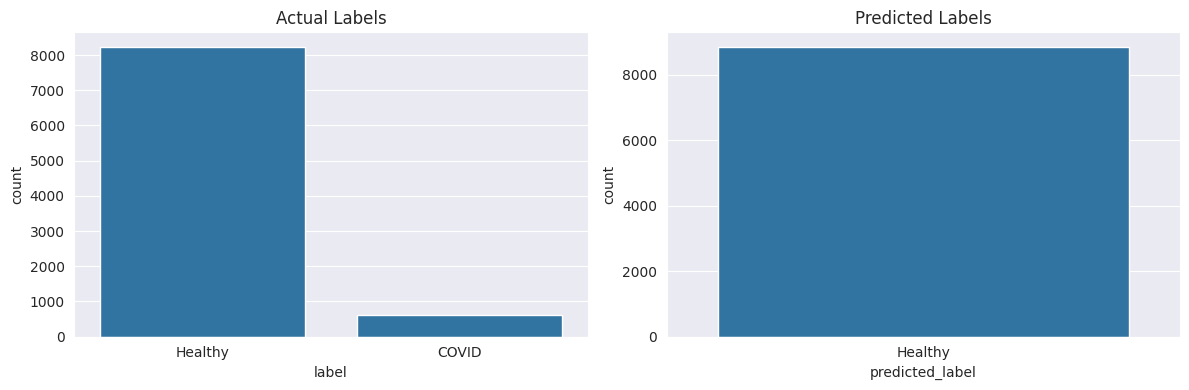

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='label', data=df, ax=axes[0])
axes[0].set_title("Actual Labels")
axes[0].set_xticklabels(['Healthy', 'COVID'])

sns.countplot(x='predicted_label', data=df, ax=axes[1])
axes[1].set_title("Predicted Labels")
axes[1].set_xticklabels(['Healthy', 'COVID'])

plt.tight_layout()
plt.show()


In [4]:
# Add correctness flag
df["is_correct"] = df["label"] == df["predicted_label"]

# False Positives: predicted 1, actual 0
fp = df[(df["label"] == 0) & (df["predicted_label"] == 1)]

# False Negatives: predicted 0, actual 1
fn = df[(df["label"] == 1) & (df["predicted_label"] == 0)]

# Display counts
print(f"False Positives: {len(fp)}")
print(f"False Negatives: {len(fn)}")

# Optional: show a few examples
fp.head(3), fn.head(3)


False Positives: 0
False Negatives: 0


(Empty DataFrame
 Columns: [filename, json_file, status, age, gender, cough_detected, respiratory_condition, fever_muscle_pain, difficulty_in_breathing, label, predicted_prob, predicted_label, is_correct]
 Index: [],
 Empty DataFrame
 Columns: [filename, json_file, status, age, gender, cough_detected, respiratory_condition, fever_muscle_pain, difficulty_in_breathing, label, predicted_prob, predicted_label, is_correct]
 Index: [])

In [5]:
# Filter the actual COVID-19 samples
covid_samples = df[df["label"] == 1]

# Visual inspection of a few cases
covid_samples[["filename", "age", "gender", "status", "cough_detected", "respiratory_condition", "fever_muscle_pain", "difficulty_in_breathing", "predicted_prob"]].head(10)


,filename,age,gender,status,cough_detected,respiratory_condition,fever_muscle_pain,difficulty_in_breathing,predicted_prob


In [8]:
# Separate groups
misclassified_covid = df[(df["label"] == 1) & (df["predicted_label"] == 0)].copy()
correctly_classified_healthy = df[(df["label"] == 0) & (df["predicted_label"] == 0)].copy()

# Tag each group
misclassified_covid["group"] = "COVID → Healthy (FN)"
correctly_classified_healthy["group"] = "Healthy → Healthy (TN)"

# Combine if not empty
if len(misclassified_covid) > 0 and len(correctly_classified_healthy) > 0:
    compare_df = pd.concat([misclassified_covid, correctly_classified_healthy])
    plt.figure(figsize=(8, 4))
    sns.histplot(data=compare_df, x="age", hue="group", kde=True, bins=20, palette="coolwarm")
    plt.title("Age Distribution: Misclassified COVID vs True Healthy")
    plt.xlabel("Age")
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified COVID samples available to compare.")


No misclassified COVID samples available to compare.


In [9]:
# Only proceed if both groups exist
if len(misclassified_covid) > 0 and len(correctly_classified_healthy) > 0:
    compare_df = pd.concat([misclassified_covid, correctly_classified_healthy])
    plt.figure(figsize=(6, 4))
    sns.countplot(data=compare_df, x="gender", hue="group", palette="Set2")
    plt.title("Gender Distribution: Misclassified COVID vs True Healthy")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("No misclassified COVID samples available to compare gender.")


No misclassified COVID samples available to compare gender.
